# Fundamentals of Data Analysis Project 2019

Peter McGowan
G00190832

## Introduction

Placeholder: images and intro

## Setup

In [34]:
# Import pandas for managing data
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Magic command to ensure that plots render inline
%matplotlib inline

In [21]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

The tips dataset is conveniently included with Seaborn as a Pandas dataframe - so I can call it directly. I'll load it as "df".

In [8]:
df = sns.load_dataset("tips")

## Description

### Checking the Dataset

Before producing descriptive statistics, its a good idea to check the integrity and completeness of the dataset.

In [4]:
# Check the head
df.head(n=5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the tail
df.tail(n=5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Checking against the [Github page](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) for the tips dataset, I expect to see 244 entries - the data import has been successful and now I can move onto to a more detailed analysis.

### Basic Statistics

The describe() function in Pandas is very useful for an initial look at the properties of a dataset. I've also rounded all outputs to three decimal places - as I am most interested in analysing monetary amounts (which should be given to two decimal places), an additional decimal place should be sufficient for the purposes of analysis.

In [14]:
# Describe the dataset
round(df.describe(),3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


Describe() only produces an output on numerical columns - here it includes columns for total_bill (the total bill amount - a float), tip (the tip amount associated with the bill - float) and size (the size of the party billed - integer). I can make the following observations:
* Each column has a count of 244, indicating that there are no missing values;
* The means seem reasonable (pending an analysis of the distribution) - just under \\$20 for the mean total bill, a mean tip of \\$3 (equating to 15% of the average total bill which seems realistic) and the mean party size is just over 2.5;
* The Standard Deviation indicates the dispersion - as expected, the total bill has a fairly wide dispersion whereas the smaller values for tip and size shows that their values tend relatively closely to the mean;
* The Min and Max values lead to some interesting observations:
    * The smallest bill recorded is quite low (\\$3.07) - most likely referring to a single customer ordering 1-2 items. The largest bill is \\$50.81 which seems fairly unremarkable;
    * The smallest tip is \\$1.00 - tipping with a single dollar bill seems likely. The largest tip is $10.00 - another convenient denomination of money;
    * The size varies between 1 and 6. A minimum different to 1 would be unusual, whereas 6 may represent the largest table size available;
* The percentiles (25%, 50%/ median, 75%) are quite in line with the other observations. The median value is lower than the mean for all columns - I would therefore expect that the distribution of all columns is not particularly symmetrical.

Before moving on I'll also sum the numerical columns to get an appreciation of what the dataset represents.

In [7]:
# Sum numerical columns only
df.sum(axis = 0, skipna = True, numeric_only = True)

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64

Therefore the dataset is representing a total of 627 customers in 244 parties, spending a total of \\$4827.77 and tipping \\$731.58 on that.

### Distribution

The aim of this analysis mainly is to investigate whether a relationship exists between the total bill and the tip. Firstly I will look at the distribution - I had make several assumptions above that I'd like to check out. I'll display the histograms of both columns using Seaborn's distplot() function. I also want to see the mean dollar value for each, so I'll display it as a vertical dashed line with the same colour as the distplot.

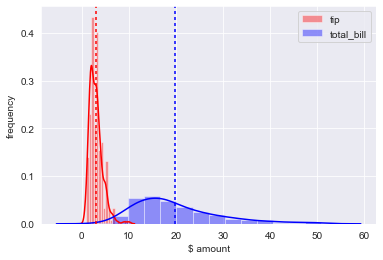

In [55]:
# Visualising the distribution of the total_bill and tip columns
sns.distplot(df['tip'], label = "tip", color = 'r')
sns.distplot(df['total_bill'], label = "total_bill", color = 'b')
#sns.distplot(df['size'], label = "size")
plt.xlabel("$ amount")
plt.ylabel("frequency")

plt.axvline(x = np.mean(df['tip']), color = 'r', dashes=(2,2,2,2))
plt.axvline(x = np.mean(df['total_bill']), color = 'b', dashes=(2,2,2,2))
plt.legend()

** perhaps add skewness/ kurtosis to analysis above?

Pairwise relationship:

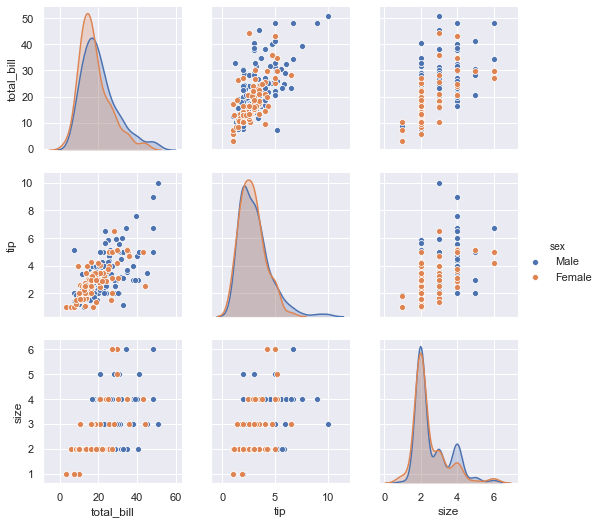

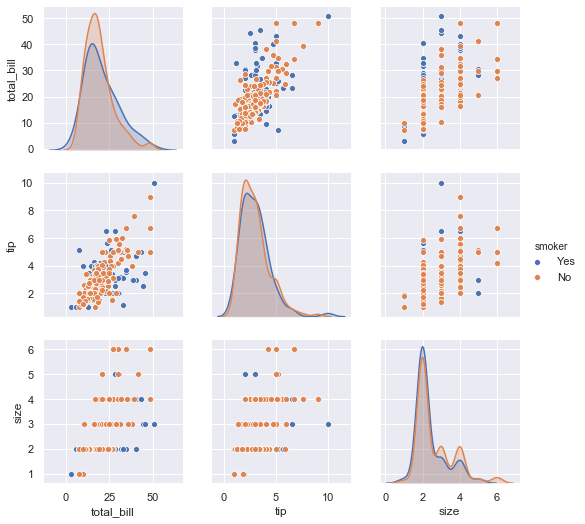

In [10]:
# Pairplots, mainly for quick error checking etc
sns.pairplot(df, hue = 'sex')
sns.pairplot(df, hue = 'smoker')

Investigate the distribution of observations within categories:

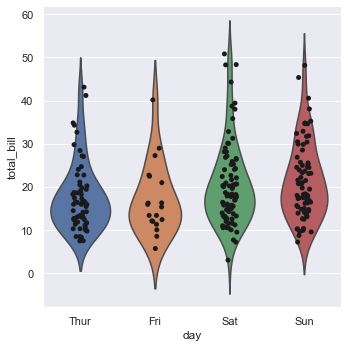

In [11]:
# Tweak style of swarm/strip
# Violin Plot with stripplot
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.stripplot(x="day", y="total_bill", color = "k", data=tips, ax=g.ax);

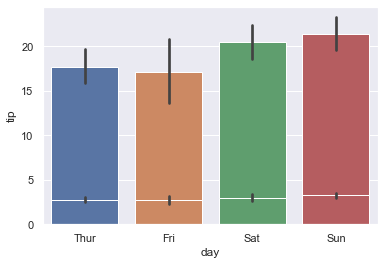

In [12]:
# Use catplot to add multiple
# Barplots of total bill and tip
sns.barplot(x="day", y="total_bill", data=tips) # Adjust colours to make tips more visible
sns.barplot(x="day", y="tip", data=tips)

## Regression

Next we need to determine whether or not there is a relationship between the total bill and tip amaount.

First we will generate a scatterplot of the observations.

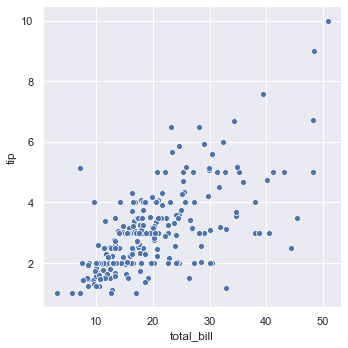

In [13]:
sns.relplot(x="total_bill", y="tip", data=tips)

We can break this down by category as shown below.

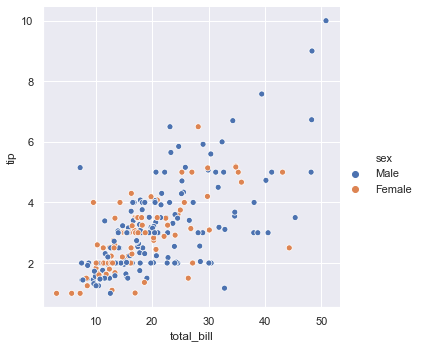

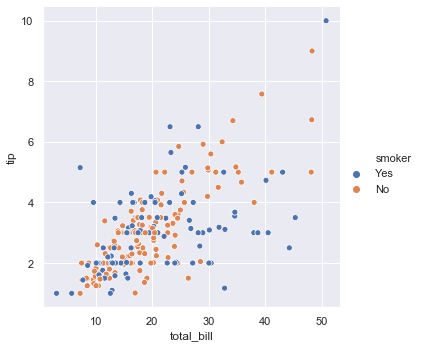

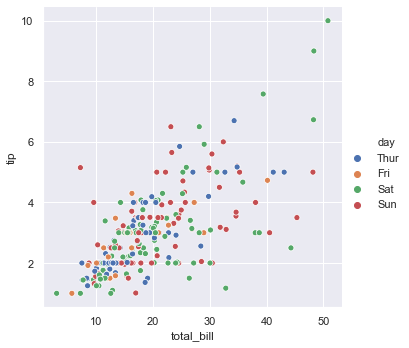

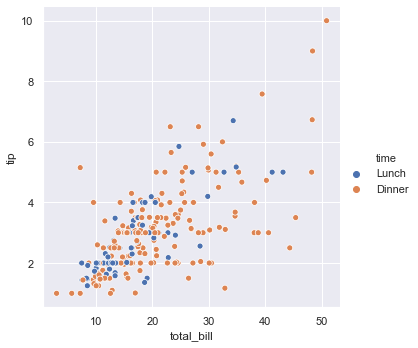

In [14]:
# Recreate as a facet grid
# Plots of the relationships for each column
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.relplot(x="total_bill", y="tip", hue="time", data=tips)

We can go one step further and visualise the linear relationshop through the observations with lmplot.

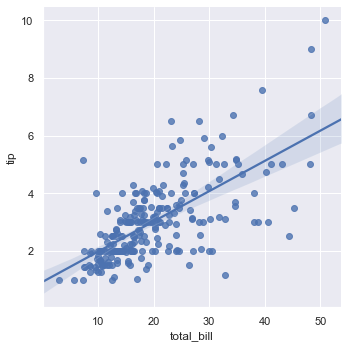

In [15]:
sns.lmplot(x="total_bill", y="tip", data=tips)

** Discussion of the above

** Add discussion on model fitting, further checks etc https://seaborn.pydata.org/tutorial/regression.html

## Analyse